# 🌾 **Crop Recommendation System — Data Augmentation & Noise Injection**


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
crop = pd.read_csv("/content/crop_Dataset.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [25]:
crop.shape

(2200, 8)

In [26]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [27]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [28]:
print("Original rows:", len(crop))
crop = crop.drop_duplicates()
print("Rows after removing duplicates:", len(crop))

Original rows: 2200
Rows after removing duplicates: 2200


In [29]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [30]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [31]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [32]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [33]:
X = crop.drop(['crop_num'],axis=1)
y = crop['crop_num']
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [34]:
y

,crop_num
0,1
1,1
2,1
3,1
4,1
...,...
2195,22
2196,22
2197,22
2198,22


In [35]:
y.shape

(2200,)

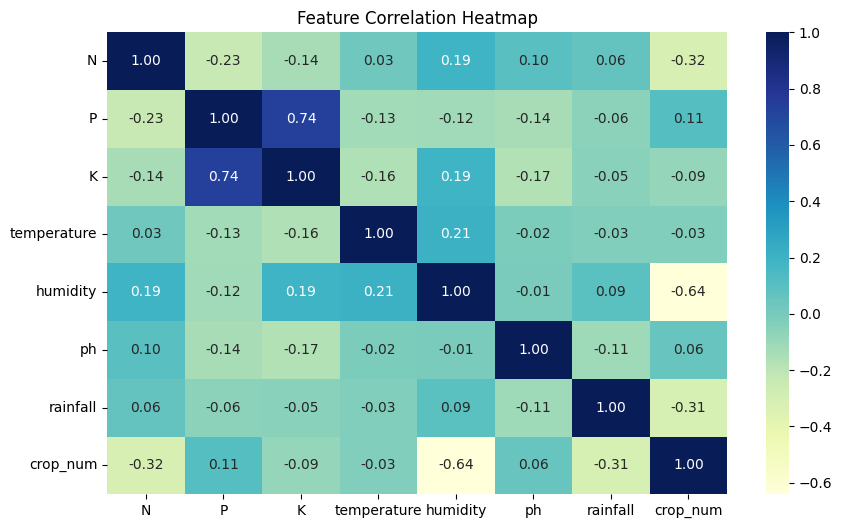

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(crop.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [38]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

# Bas .values add kar dein
X_train = ms.fit_transform(X_train.values)
X_test = ms.transform(X_test.values)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
}

print("--- Model Comparison Start ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print(f"{name} with accuracy : {accuracy_score(y_test, ypred)}")
    print("Confusion matrix : \n", confusion_matrix(y_test, ypred))
    print("==========================================================")

--- Model Comparison Start ---
Logistic Regression with accuracy : 0.9181818181818182
Confusion matrix : 
 [[16  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0 

In [40]:
print("\n--- Final Model Training ---")
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

ypred_final = dtc.predict(X_test)
print(f"Final Decision Tree Model  accuracy: {accuracy_score(y_test, ypred_final)}")


--- Final Model Training ---
Final Decision Tree Model  accuracy: 0.9840909090909091


In [41]:
def recommendation(N, P, k, temperature, humidity, ph, rainfal):
    features = np.array([[N, P, k, temperature, humidity, ph, rainfal]])

    transformed_features = ms.transform(features)
    prediction = dtc.predict(transformed_features)   #decision tree

    print(prediction)
    return prediction[0]

Logistic Regression Accuracy: 91.82%
Support Vector Machine Accuracy: 96.82%
K-Nearest Neighbors Accuracy: 97.05%
Decision Tree Accuracy: 98.64%


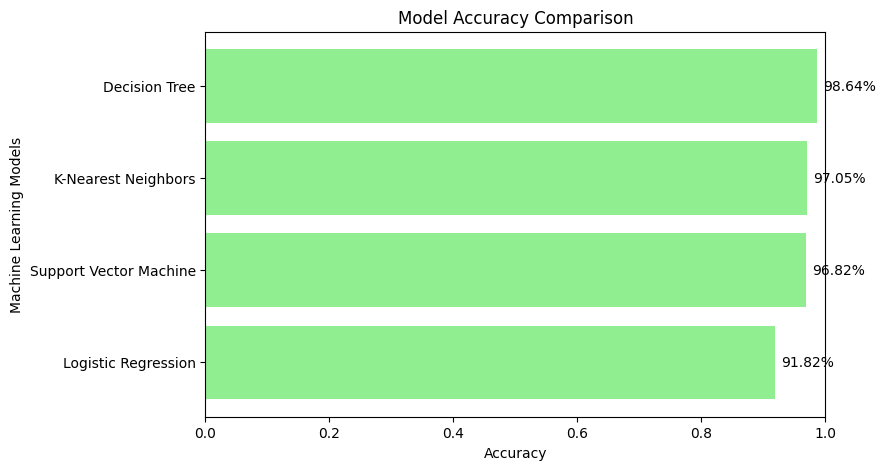

In [42]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

accuracies = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc*100:.2f}%")

plt.figure(figsize=(8,5))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='lightgreen')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Machine Learning Models')
plt.xlim(0, 1)
for i, v in enumerate(list(accuracies.values())):
    plt.text(v + 0.01, i, f"{v*100:.2f}%", va='center')
plt.show()

In [43]:
#sample test case
N = 100
P = 90
k = 100
temperature = 50.0
humidity = 90.0
ph = 100
rainfall = 202.0

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[13]
Banana is a best crop to be cultivated 


In [44]:
#multiple test cases
test_cases = [
    (88, 40, 38, 27.5, 78, 6.3, 220),
    (15, 20, 30, 33.2, 40, 7.1, 60),
    (65, 55, 50, 22.1, 82, 6.7, 200),
    (48, 25, 20, 17.9, 55, 6.8, 110),
    (32, 10, 15, 35.0, 28, 7.3, 45),
    (72, 58, 68, 29.8, 84, 6.0, 270),
    (25, 12, 18, 20.0, 65, 7.5, 95),
    (56, 40, 35, 25.3, 70, 5.9, 180),
    (80, 62, 74, 31.5, 88, 6.2, 260),
    (44, 38, 46, 16.2, 68, 6.6, 125),
    (30, 20, 22, 36.0, 32, 7.0, 55),
    (50, 35, 40, 27.0, 72, 6.4, 150),
    (90, 50, 60, 24.5, 80, 5.8, 210),
    (22, 15, 10, 19.0, 58, 7.2, 100),
    (75, 55, 65, 28.4, 85, 6.1, 250),
    (40, 48, 42, 23.0, 63, 6.5, 140),
    (58, 45, 50, 21.2, 76, 6.7, 190),
    (26, 30, 28, 34.0, 30, 7.4, 70),
    (85, 65, 70, 30.5, 90, 6.0, 300),
    (38, 28, 36, 18.5, 66, 5.5, 120),
]

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

for i, vals in enumerate(test_cases, start=1):
    predict = recommendation(*vals)
    crop = crop_dict.get(predict, "Unknown")
    print(f"Case {i}: {vals} Recommended: {crop}")

[1]
Case 1: (88, 40, 38, 27.5, 78, 6.3, 220) Recommended: Rice
[18]
Case 2: (15, 20, 30, 33.2, 40, 7.1, 60) Recommended: Mothbeans
[1]
Case 3: (65, 55, 50, 22.1, 82, 6.7, 200) Recommended: Rice
[12]
Case 4: (48, 25, 20, 17.9, 55, 6.8, 110) Recommended: Mango
[18]
Case 5: (32, 10, 15, 35.0, 28, 7.3, 45) Recommended: Mothbeans
[1]
Case 6: (72, 58, 68, 29.8, 84, 6.0, 270) Recommended: Rice
[12]
Case 7: (25, 12, 18, 20.0, 65, 7.5, 95) Recommended: Mango
[12]
Case 8: (56, 40, 35, 25.3, 70, 5.9, 180) Recommended: Mango
[1]
Case 9: (80, 62, 74, 31.5, 88, 6.2, 260) Recommended: Rice
[12]
Case 10: (44, 38, 46, 16.2, 68, 6.6, 125) Recommended: Mango
[18]
Case 11: (30, 20, 22, 36.0, 32, 7.0, 55) Recommended: Mothbeans
[12]
Case 12: (50, 35, 40, 27.0, 72, 6.4, 150) Recommended: Mango
[1]
Case 13: (90, 50, 60, 24.5, 80, 5.8, 210) Recommended: Rice
[12]
Case 14: (22, 15, 10, 19.0, 58, 7.2, 100) Recommended: Mango
[1]
Case 15: (75, 55, 65, 28.4, 85, 6.1, 250) Recommended: Rice
[19]
Case 16: (40, 48, 

In [45]:
#Library to save model
import pickle
pickle.dump(dtc, open('model.pkl', 'wb'))
pickle.dump(ms, open('minmaxscaler.pkl', 'wb'))